In [47]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [48]:
# Import data
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2020/12/31')
df.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        NKE       GOOGL        AMZN       AAPL   
Date                                                                  
2015-01-02  24.898552  44.437469  529.549988  308.519989  27.332500   
2015-01-05  24.197117  43.722023  519.460022  302.190002  26.562500   
2015-01-06  24.199400  43.464821  506.640015  295.290009  26.565001   
2015-01-07  24.538729  44.362659  505.149994  298.420013  26.937500   
2015-01-08  25.481558  45.386726  506.910004  300.459991  27.972500   

Attributes                                          High             ...  \
Symbols           NKE       GOOGL        AMZN       AAPL        NKE  ...   
Date                                                                 ...   
2015-01-02  47.514999  529.549988  308.519989  27.860001  48.474998  ...   
2015-01-05  46.750000  519.460022  302.190002  27.162500  47.275002  ...   
2015-01-06  46.474998  506.640015  295.290009  26.857500  47.075001  ...   
2015-01-07  47.435001  505.149994  298.420013  27.049999  47.650002  ...   
2015-01-08  48.529999  506.910004  300.459991  28.037500  48.549999  ...   

Attributes         Low                   Open                         \
Symbols          GOOGL        AMZN       AAPL        NKE       GOOGL   
Date                                                                   
2015-01-02  527.880005  306.959991  27.847500  48.275002  532.599976   
2015-01-05  517.750000  300.850006  27.072500  47.255001  527.150024   
2015-01-06  505.549988  292.380005  26.635000  46.945000  520.500000   
2015-01-07  503.649994  295.329987  26.799999  46.805000  510.950012   
2015-01-08  495.019989  296.109985  27.307501  47.830002  501.510010   

Attributes                   Volume                                   
Symbols           AMZN         AAPL        NKE      GOOGL       AMZN  
Date                                                                  
2015-01-02  312.579987  212818400.0  4985800.0  1324000.0  2783200.0  
2015-01-05  307.010010  257142000.0  6889200.0  2059100.0  2774200.0  
2015-01-06  302.239990  263188400.0  7576000.0  2722800.0  3519000.0  
2015-01-07  297.500000  160423600.0  7256000.0  2345900.0  2640300.0  
2015-01-08  300.320007  237458000.0  5978200.0  3652700.0  3088400.0  

[5 rows x 24 columns]

In [49]:
# Closing price
df = df['Adj Close']
df.head()

Symbols          AAPL        NKE       GOOGL        AMZN
Date                                                    
2015-01-02  24.898552  44.437469  529.549988  308.519989
2015-01-05  24.197117  43.722023  519.460022  302.190002
2015-01-06  24.199400  43.464821  506.640015  295.290009
2015-01-07  24.538729  44.362659  505.149994  298.420013
2015-01-08  25.481558  45.386726  506.910004  300.459991

In [50]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols      AAPL       NKE     GOOGL      AMZN
Symbols                                        
AAPL     0.000349  0.000149  0.000193  0.000202
NKE      0.000149  0.000296  0.000138  0.000118
GOOGL    0.000193  0.000138  0.000283  0.000213
AMZN     0.000202  0.000118  0.000213  0.000375

In [51]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols      AAPL       NKE     GOOGL      AMZN
Symbols                                        
AAPL     1.000000  0.463855  0.612571  0.558135
NKE      0.463855  1.000000  0.477894  0.354783
GOOGL    0.612571  0.477894  1.000000  0.654419
AMZN     0.558135  0.354783  0.654419  1.000000

In [52]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00021419541046200665

In [53]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.453638
NKE      0.211866
GOOGL    0.186028
AMZN     0.389235
dtype: float64

In [54]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.25859808537700557

In [55]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.295433
NKE      0.272015
GOOGL    0.266021
AMZN     0.306306
dtype: float64

In [56]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

Returns  Volatility
Symbols                      
AAPL     0.453638    0.295433
NKE      0.211866    0.272015
GOOGL    0.186028    0.266021
AMZN     0.389235    0.306306

In [57]:
assets['ESG'] = [27.42, 22.85, 23.65, 27.42 ]

In [58]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
p_esg = []

num_assets = len(df.columns)
num_portfolios = 10000

In [59]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
    esg = np.dot(weights, assets['ESG'])
    p_esg.append(esg)

In [60]:


data = {'Returns':p_ret, 'Volatility':p_vol, 'ESG': p_esg}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [61]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

Returns  Volatility        ESG  AAPL weight  NKE weight  GOOGL weight  \
0  0.294871    0.229666  24.942984     0.338946    0.251174      0.352560   
1  0.267965    0.225894  24.633186     0.144361    0.284883      0.393872   
2  0.276193    0.233658  24.972207     0.118227    0.163610      0.450953   
3  0.255247    0.224209  24.330913     0.105985    0.372557      0.367772   
4  0.314495    0.230790  25.484285     0.237824    0.207089      0.262419   

   AMZN weight  
0     0.057320  
1     0.176884  
2     0.267210  
3     0.153686  
4     0.292668

In [62]:
from mpl_toolkits.mplot3d import Axes3D 

Text(0.5, 0, 'ESG')

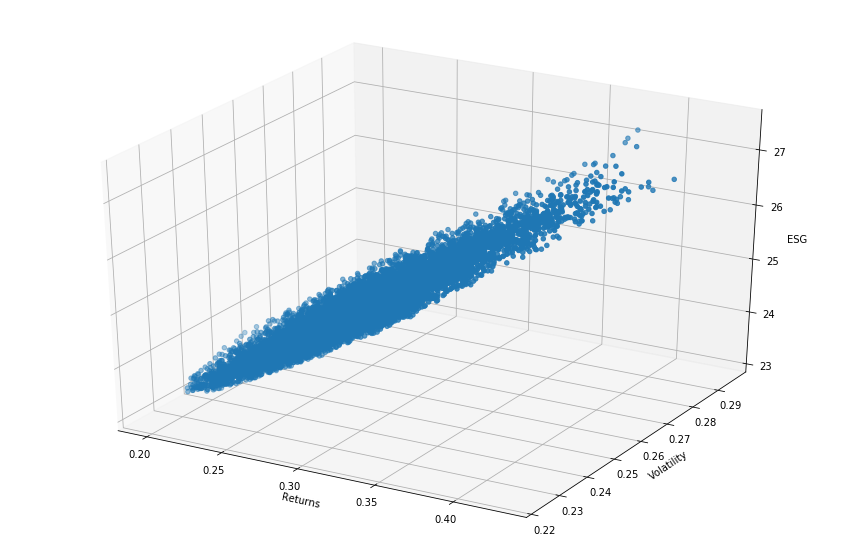

In [63]:
fig = plt.figure(figsize =(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(portfolios['Returns'], portfolios['Volatility'], portfolios['ESG'])

ax.set_xlabel('Returns')
ax.set_ylabel('Volatility')
ax.set_zlabel('ESG')

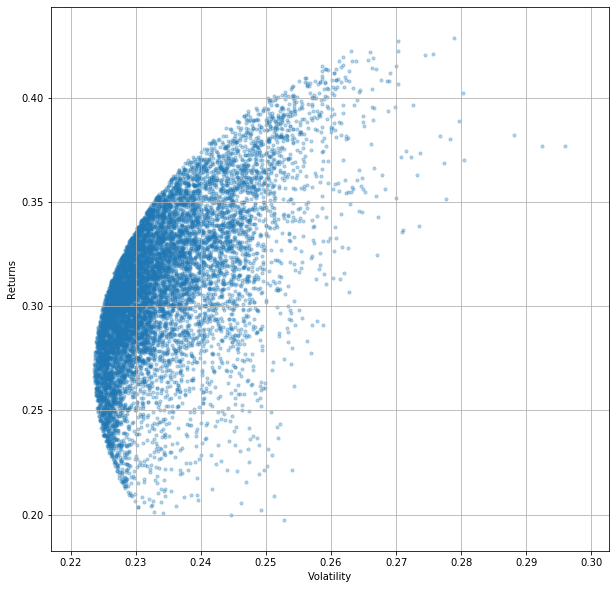

In [64]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [65]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns          0.269945
Volatility       0.223612
ESG             24.526908
AAPL weight      0.143824
NKE weight       0.397171
GOOGL weight     0.285947
AMZN weight      0.173058
Name: 2669, dtype: float64

In [66]:
portfolios['min_vol'] = np.where(portfolios['Volatility'] ==portfolios['Volatility'].min(),'min','non_min')

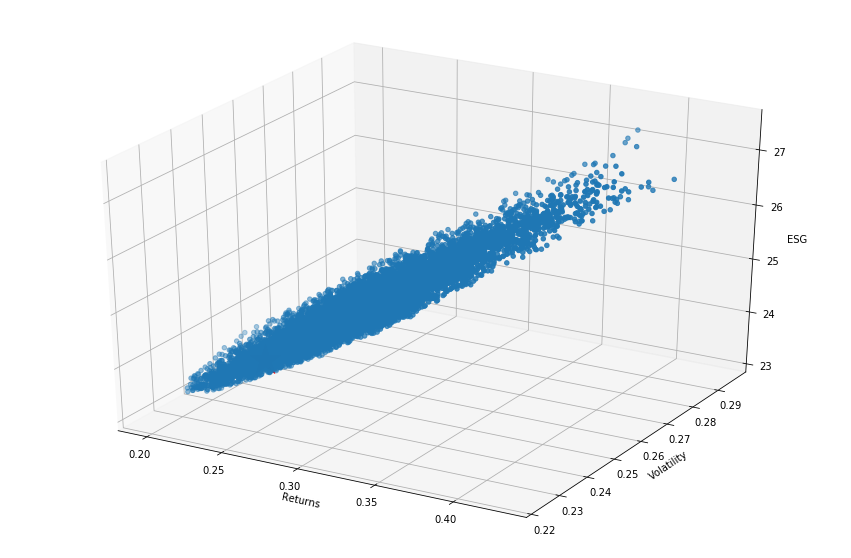

In [67]:
fig = plt.figure(figsize =(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(portfolios['Returns'], portfolios['Volatility'], portfolios['ESG'])

ax.set_xlabel('Returns')
ax.set_ylabel('Volatility')
ax.set_zlabel('ESG')
ax.scatter(xs = min_vol_port[0], ys =min_vol_port[1],zs= min_vol_port[2],color='r', marker='*', s=1000)

In [68]:
px.scatter(portfolios, x='Volatility', y='Returns', color='ESG', opacity =0.8)

In [151]:
import plotly.express as px
fig = px.scatter_3d(portfolios, x='Returns', y='Volatility', z='ESG', opacity =0.8, color = 'min_vol')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [70]:
portfolios['sharp_max'] = np.where(portfolios.index==((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax(), 'sharp_max', 'non_max')

In [71]:
import plotly.express as px
fig = px.scatter_3d(portfolios, x='Returns', y='Volatility', z='ESG', opacity =0.8, color = 'sharp_max')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [45]:
idx_sharp =((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()

In [72]:
normal_marks = dict(
            color = portfolios['ESG'],    # Changed marker color to look cleaner with a boundary
            size=12,
            symbol='circle',
            opacity=0.4,      # Brought down the opacity and boundaries often allow for this
           # line = raw_line   # We give the pre-defined dictionary to this attribute.
    )
special_mark = dict(
    color = 'red',
    size =18,
    symbol = 'star'
    )

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter( x=portfolios['Volatility'], y=portfolios['Returns'],mode ='markers', name='Raw Data',
                  # Instead of all the code we had before, just the pre-defined dictionary
                  marker= normal_marks)),
#fig.add_trace(go.Scatter(x=[portfolios['Volatility'][0]], y=[portfolios['Returns'][0]], mode='markers', name='Minimum Volatility', marker = special_mark))
fig.add_trace(go.Scatter(x=[portfolios['Volatility'][idx_sharp]], y=[portfolios['Returns'][idx_sharp]], mode='markers', name='Optimal Sharp', marker = special_mark))

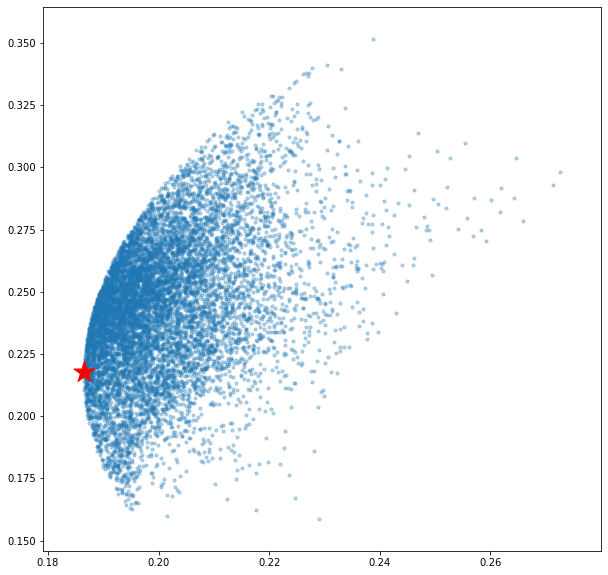

In [33]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [44]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns          0.425536
Volatility       0.264084
ESG             27.227984
AAPL weight      0.681651
NKE weight       0.039881
GOOGL weight     0.002589
AMZN weight      0.275879
Name: 1609, dtype: float64

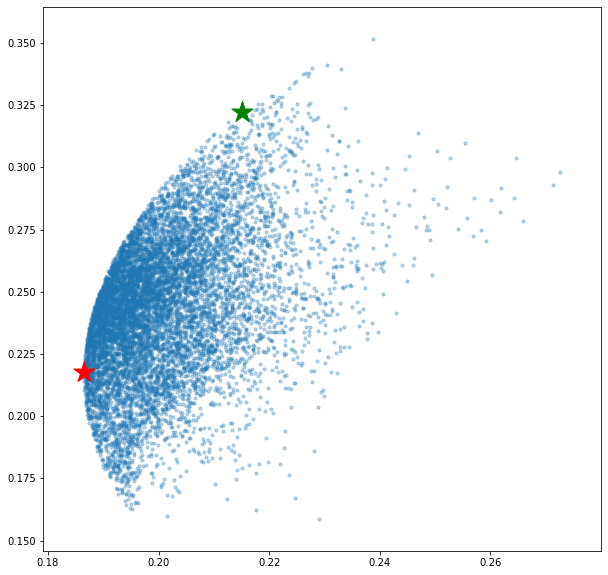

In [35]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)